# EDA done on news data


## Import and Load Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Optional for nice plots
sns.set(style="whitegrid")

# Load dataset
df = pd.read_csv('../data/raw_analyst_ratings.csv')  # Change filename as needed

# Convert to datetime (naive datetime)
df['date'] = pd.to_datetime(df['date'], errors='coerce')
print(df['date'].isnull().sum())

# Localize to original timezone (UTC-4), then convert to UTC
df['date'] = pd.to_datetime(df['date']).dt.tz_convert('UTC')


1351341


## Descriptive Statistics

### Headline Length Analysis

Headline Length Statistics:
count    1.407328e+06
mean     1.141671e+01
std      6.352997e+00
min      1.000000e+00
25%      7.000000e+00
50%      1.000000e+01
75%      1.300000e+01
max      7.700000e+01
Name: headline_length, dtype: float64


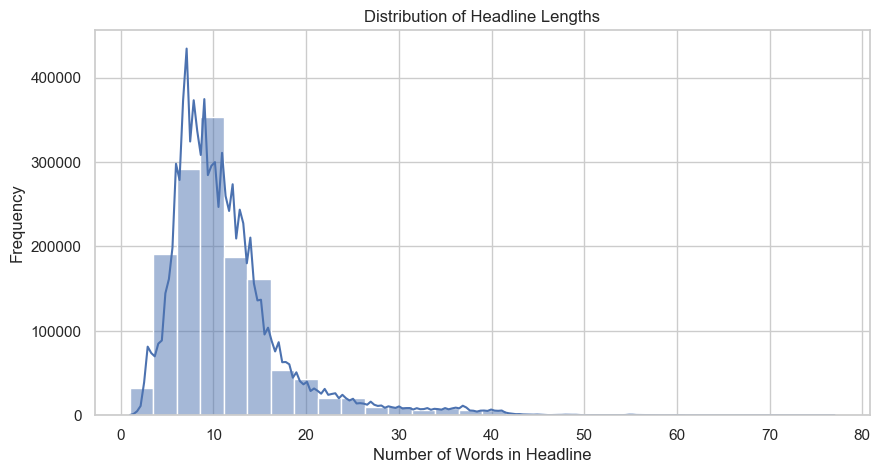

In [5]:
df['headline_length'] = df['headline'].apply(lambda x: len(str(x).split()))

print("Headline Length Statistics:")
print(df['headline_length'].describe())

plt.figure(figsize=(10, 5))
sns.histplot(df['headline_length'], bins=30, kde=True)
plt.title('Distribution of Headline Lengths')
plt.xlabel('Number of Words in Headline')
plt.ylabel('Frequency')
plt.show()


### Most Active Publishers

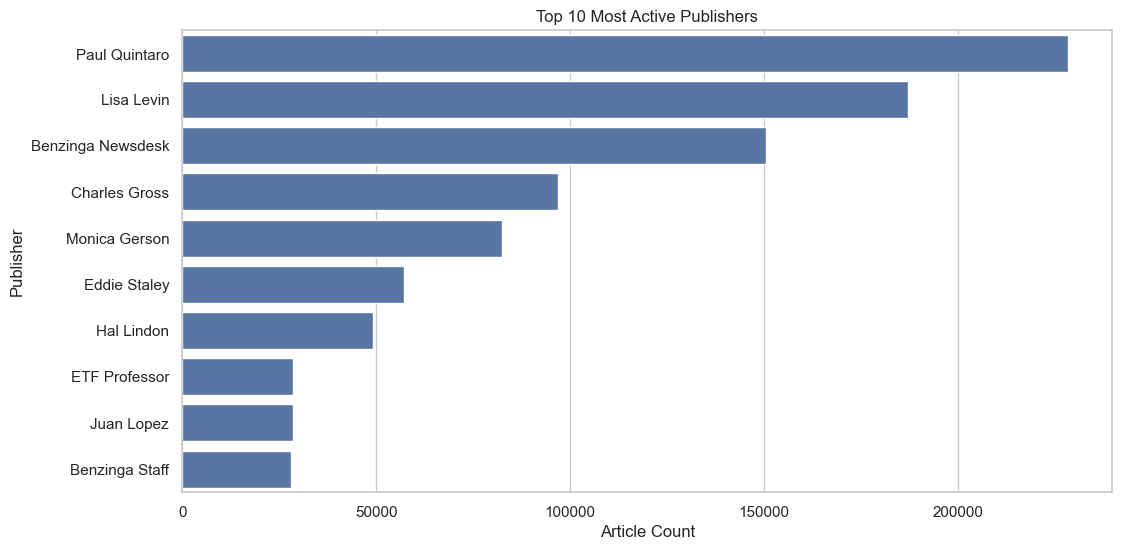

In [6]:
publisher_counts = df['publisher'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=publisher_counts.values, y=publisher_counts.index)
plt.title("Top 10 Most Active Publishers")
plt.xlabel("Article Count")
plt.ylabel("Publisher")
plt.show()


### Most Mentioned Stocks

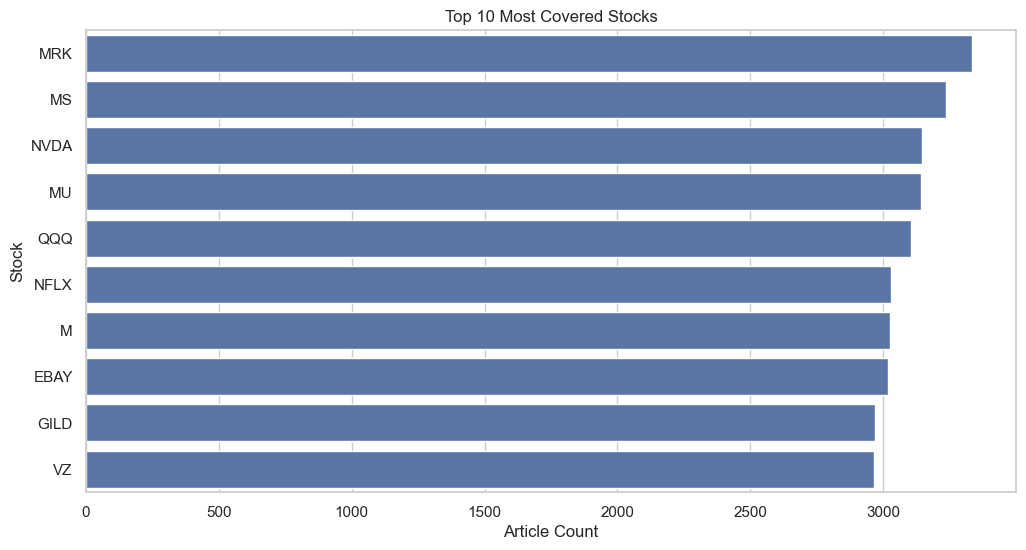

In [7]:
stock_counts = df['stock'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=stock_counts.values, y=stock_counts.index)
plt.title("Top 10 Most Covered Stocks")
plt.xlabel("Article Count")
plt.ylabel("Stock")
plt.show()


## Time Series Analysis

### Articles over time(Day)

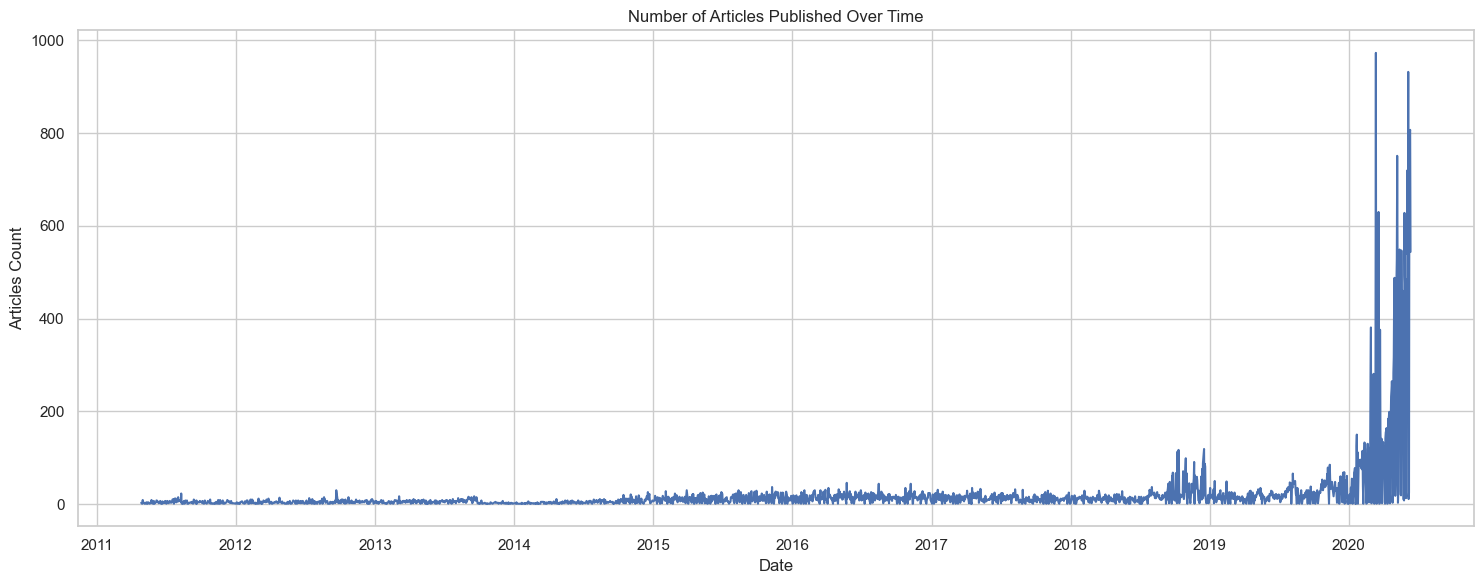

In [8]:
df['date_only'] = df['date'].dt.date
daily_counts = df.groupby('date_only').size()

plt.figure(figsize=(15, 6))
daily_counts.plot()
plt.title("Number of Articles Published Over Time")
plt.xlabel("Date")
plt.ylabel("Articles Count")
plt.grid(True)
plt.tight_layout()
plt.show()


### Articles by Hour

C:\Users\Hp\AppData\Local\Temp\ipykernel_344908\1638203076.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hour', data=df, palette="coolwarm")


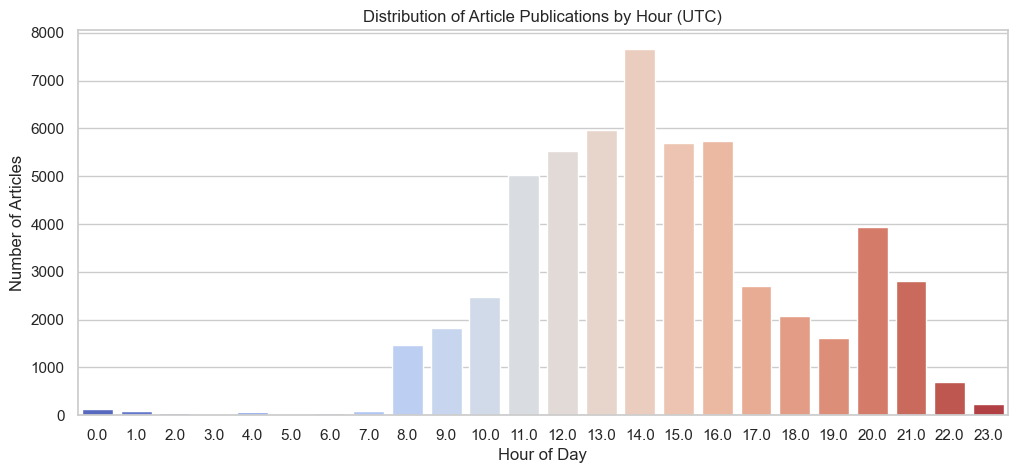

In [9]:
df['hour'] = df['date'].dt.hour

plt.figure(figsize=(12, 5))
sns.countplot(x='hour', data=df, palette="coolwarm")
plt.title("Distribution of Article Publications by Hour (UTC)")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Articles")
plt.show()


## Publisher Analysis

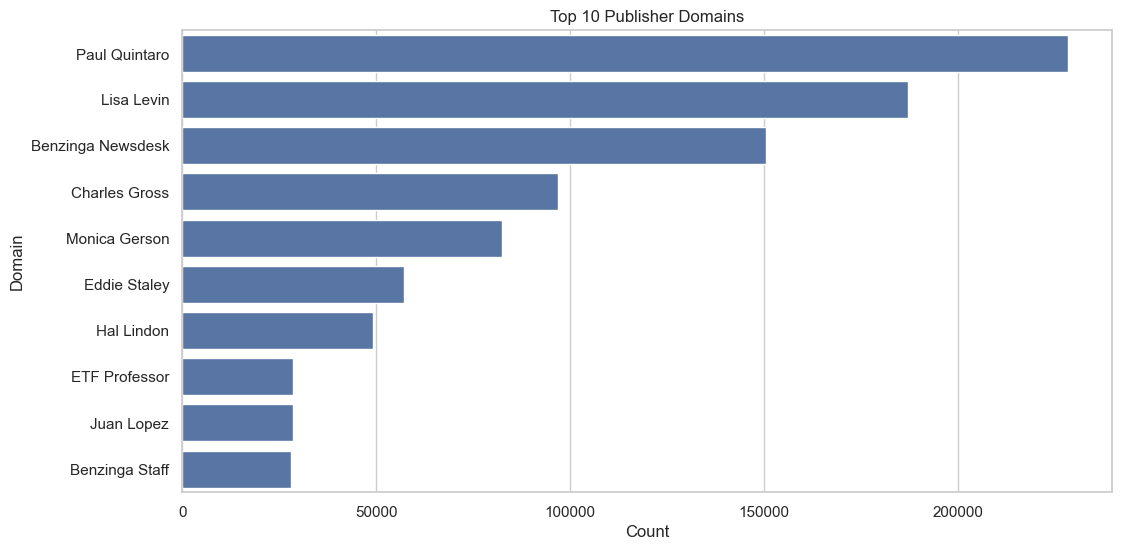

In [10]:
import re

def extract_domain(publisher):
    match = re.search(r'@([A-Za-z0-9.-]+)', str(publisher))
    return match.group(1) if match else publisher

df['publisher_domain'] = df['publisher'].apply(extract_domain)
domain_counts = df['publisher_domain'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=domain_counts.values, y=domain_counts.index)
plt.title("Top 10 Publisher Domains")
plt.xlabel("Count")
plt.ylabel("Domain")
plt.show()
